# DIGIT RECOGNIZER

In [1]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### PRÉPARATION DES DONNÉES

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # images 28x28 en niveaux de gris

# Normalisation entre 0 et 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### CONSTRUCTION DES CNNS

In [3]:
# 10 conv layers, filtres = 16 à 176, kernel=3×3, padding=valid, BatchNorm après chaque conv et softmax
def build_m3():
    model = models.Sequential()
    model.add(layers.Input(shape=(28,28,1)))
    for i in range(10):
        model.add(layers.Conv2D(16*(i+1), (3,3), activation='relu', padding='valid'))
        model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 5 conv layers, filtres = 32 à 160, kernel=5×5, padding=valid, BatchNorm après chaque conv et softmax
def build_m5():
    model = models.Sequential()
    model.add(layers.Input(shape=(28,28,1)))
    for i in range(1,6):
        model.add(layers.Conv2D(32*i, (5,5), activation='relu', padding='valid'))
        model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 4 conv layers, filtres = 48 à 192, kernel=7×7, padding=valid, BatchNorm après chaque conv et softmax
def build_m7():
    model = models.Sequential()
    model.add(layers.Input(shape=(28,28,1)))
    for i in range(1,5):
        model.add(layers.Conv2D(48*i, (7,7), activation='relu', padding='valid'))
        model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_3 = build_m3()
cnn_5 = build_m5()
cnn_7 = build_m7()

### ENTRAINEMENT DES MODÈLES

In [4]:
print("Entraînement du CNN 3x3")
start = time.time()
history_3 = cnn_3.fit(X_train, y_train, epochs=10, batch_size=128,
                      validation_data=(X_test, y_test), verbose=1)
end = time.time()
print(f"Durée d'entraînement du CNN 3x3 : {(end - start):.2f} secondes")

Entraînement du CNN 3x3
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9079 - loss: 0.3368 - val_accuracy: 0.9755 - val_loss: 0.1348
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9762 - loss: 0.1101 - val_accuracy: 0.9805 - val_loss: 0.1196
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9832 - loss: 0.0824 - val_accuracy: 0.9834 - val_loss: 0.0945
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9867 - loss: 0.0636 - val_accuracy: 0.9804 - val_loss: 0.1158
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9873 - loss: 0.0570 - val_accuracy: 0.9890 - val_loss: 0.0498
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9894 - loss: 0.0443 - val_accuracy: 0.9892 - val_loss: 0.0534
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9919 - loss: 0.0322 - val_accuracy: 0.9889 - val_loss: 0.0499
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 

In [5]:
print("Entraînement du CNN 5x5")
start = time.time()
history_5 = cnn_5.fit(X_train, y_train, epochs=10, batch_size=128,
                      validation_data=(X_test, y_test), verbose=1)
end = time.time()
print(f"Durée d'entraînement du CNN 5x5 : {(end - start):.2f} secondes")

Entraînement du CNN 5x5
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.9252 - loss: 0.2954 - val_accuracy: 0.9471 - val_loss: 0.1867
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9824 - loss: 0.0815 - val_accuracy: 0.9763 - val_loss: 0.1306
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9846 - loss: 0.0734 - val_accuracy: 0.9851 - val_loss: 0.0786
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9890 - loss: 0.0493 - val_accuracy: 0.9873 - val_loss: 0.0706
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9912 - loss: 0.0351 - val_accuracy: 0.9867 - val_loss: 0.0681
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9922 - loss: 0.0311 - val_accuracy: 0.9870 - val_loss: 0.0615
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9922 - loss: 0.0315 - val_accuracy: 0.9900 - val_loss: 0.0522
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 

In [6]:
print("Entraînement du CNN 7x7")
start = time.time()
history_7 = cnn_7.fit(X_train, y_train, epochs=10, batch_size=128,
                      validation_data=(X_test, y_test), verbose=1)
end = time.time()
print(f"Durée d'entraînement du CNN 7x7 : {(end - start):.2f} secondes")

Entraînement du CNN 7x7
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.9301 - loss: 0.2424 - val_accuracy: 0.9239 - val_loss: 0.2141
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9840 - loss: 0.0551 - val_accuracy: 0.9857 - val_loss: 0.0505
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9881 - loss: 0.0400 - val_accuracy: 0.9865 - val_loss: 0.0457
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9897 - loss: 0.0341 - val_accuracy: 0.9896 - val_loss: 0.0347
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9911 - loss: 0.0302 - val_accuracy: 0.9905 - val_loss: 0.0367
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9920 - loss: 0.0250 - val_accuracy: 0.9869 - val_loss: 0.0437
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9938 - loss: 0.0196 - val_accuracy: 0.9873 - val_loss: 0.0563
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 

### ÉVALUATION DES PERFORMANCES

In [7]:
# Prédictions
preds_3 = cnn_3.predict(X_test)
preds_5 = cnn_5.predict(X_test)
preds_7 = cnn_7.predict(X_test)
ensemble_preds = (preds_3 + preds_5 + preds_7) / 3

# Accuracy
acc_3 = cnn_3.evaluate(X_test, y_test, verbose=0)[1]
acc_5 = cnn_5.evaluate(X_test, y_test, verbose=0)[1]
acc_7 = cnn_7.evaluate(X_test, y_test, verbose=0)[1]
ensemble_accuracy = np.mean(np.argmax(ensemble_preds, axis=1) == y_test)

print(f"Accuracy CNN 3x3 : {acc_3*100:.2f}%")
print(f"Accuracy CNN 5x5 : {acc_5*100:.2f}%")
print(f"Accuracy CNN 7x7 : {acc_7*100:.2f}%")
print(f"Accuracy Ensemble : {ensemble_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Accuracy CNN 3x3 : 98.87%
Accuracy CNN 5x5 : 98.78%
Accuracy CNN 7x7 : 98.91%
Accuracy Ensemble : 99.36%


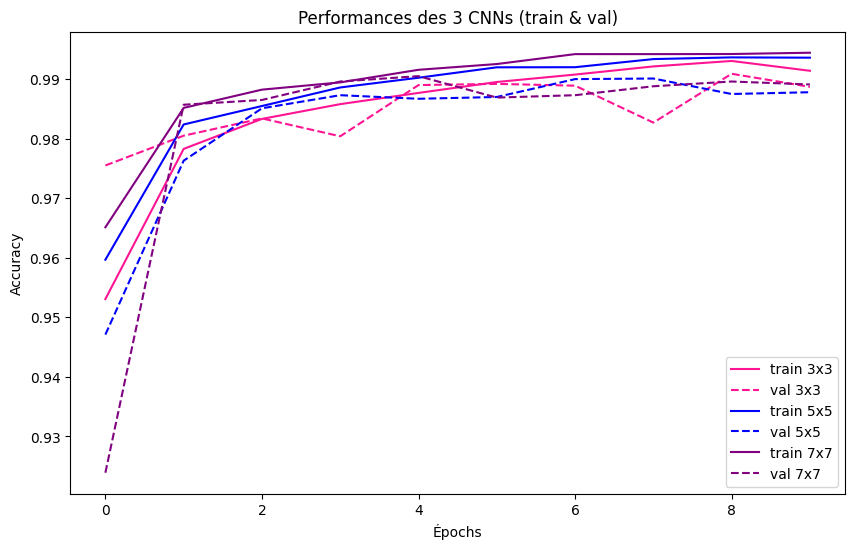

In [8]:
plt.figure(figsize=(10,6))
colors = {
    "3x3": "deeppink",
    "5x5": "blue",
    "7x7": "purple"
}
# CNN 3x3
plt.plot(history_3.history['accuracy'], label='train 3x3', color=colors["3x3"], linestyle='-')
plt.plot(history_3.history['val_accuracy'], label='val 3x3', color=colors["3x3"], linestyle='--')
# CNN 5x5
plt.plot(history_5.history['accuracy'], label='train 5x5', color=colors["5x5"], linestyle='-')
plt.plot(history_5.history['val_accuracy'], label='val 5x5', color=colors["5x5"], linestyle='--')
# CNN 7x7
plt.plot(history_7.history['accuracy'], label='train 7x7', color=colors["7x7"], linestyle='-')
plt.plot(history_7.history['val_accuracy'], label='val 7x7', color=colors["7x7"], linestyle='--')

plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Performances des 3 CNNs (train & val)")
plt.show()

In [9]:
def plot_conf_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_test, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))

    fig, ax = plt.subplots(figsize=(8,8))
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    plt.title(title)
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


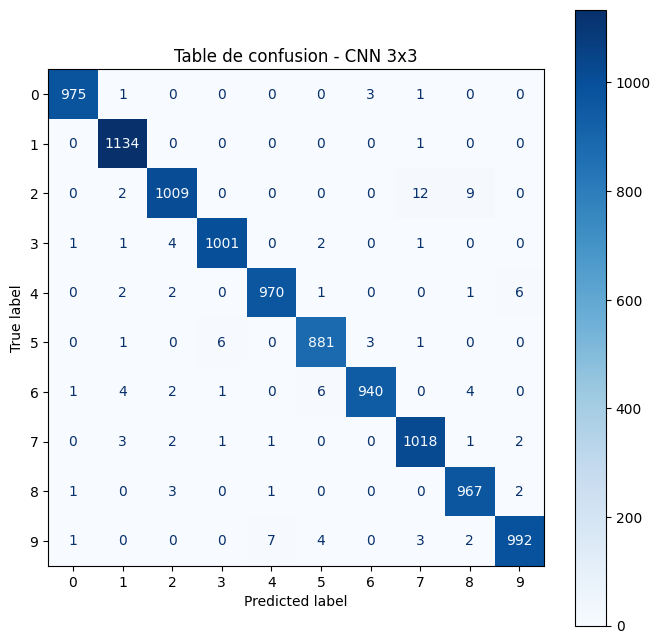

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


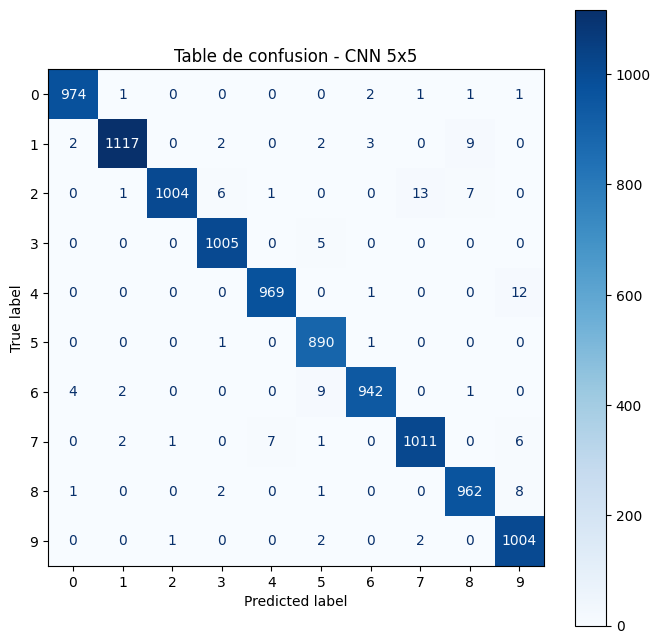

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


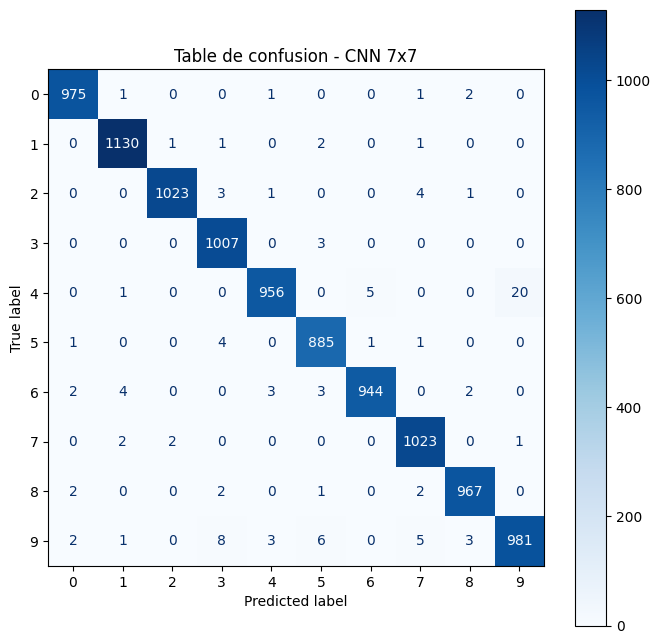

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


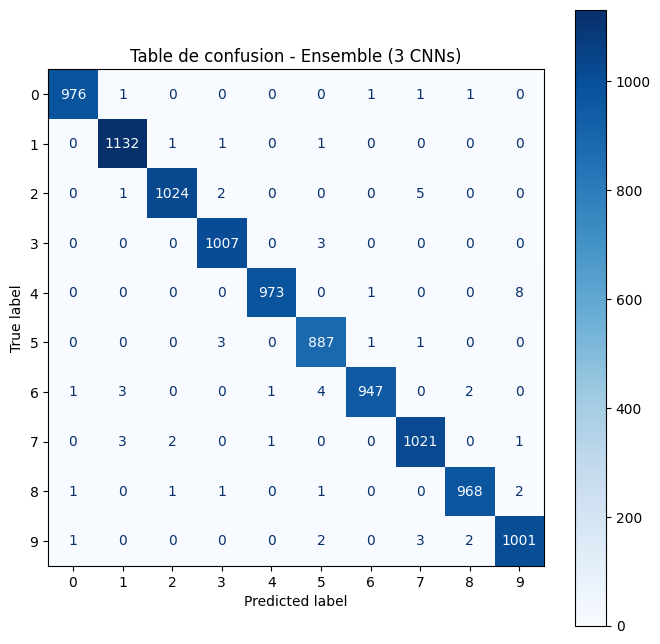

In [10]:
# CNN 3x3
plot_conf_matrix(cnn_3, X_test, y_test, "Table de confusion - CNN 3x3")
# CNN 5x5
plot_conf_matrix(cnn_5, X_test, y_test, "Table de confusion - CNN 5x5")
# CNN 7x7
plot_conf_matrix(cnn_7, X_test, y_test, "Table de confusion - CNN 7x7")
# Ensemble
ensemble_preds = (cnn_3.predict(X_test) + cnn_5.predict(X_test) + cnn_7.predict(X_test)) / 3
ensemble_classes = np.argmax(ensemble_preds, axis=1)

cm = confusion_matrix(y_test, ensemble_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Table de confusion - Ensemble (3 CNNs)")
plt.show()

SAUVEGARDE DU MODÈLE

In [11]:
# sauvegarde des modèles individuellement
for acc, model, name in [(acc_3, cnn_3, "3x3"),
                         (acc_5, cnn_5, "5x5"),
                         (acc_7, cnn_7, "7x7")]:
    accuracy_percent = int(acc * 10000) / 100
    filename = f"model-{name}-{accuracy_percent:.2f}.keras"
    model.save(filename)
    print(f"Modèle sauvegardé sous '{filename}'")

Modèle sauvegardé sous 'model-3x3-98.86.keras'
Modèle sauvegardé sous 'model-5x5-98.78.keras'
Modèle sauvegardé sous 'model-7x7-98.90.keras'
